**Description**: Analyze accuracies for $m = 50, n = 500$.

**Estimated runtime**: ~1 hour. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 50
num_test: Literal[50, 100, 200, 500] = 500

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

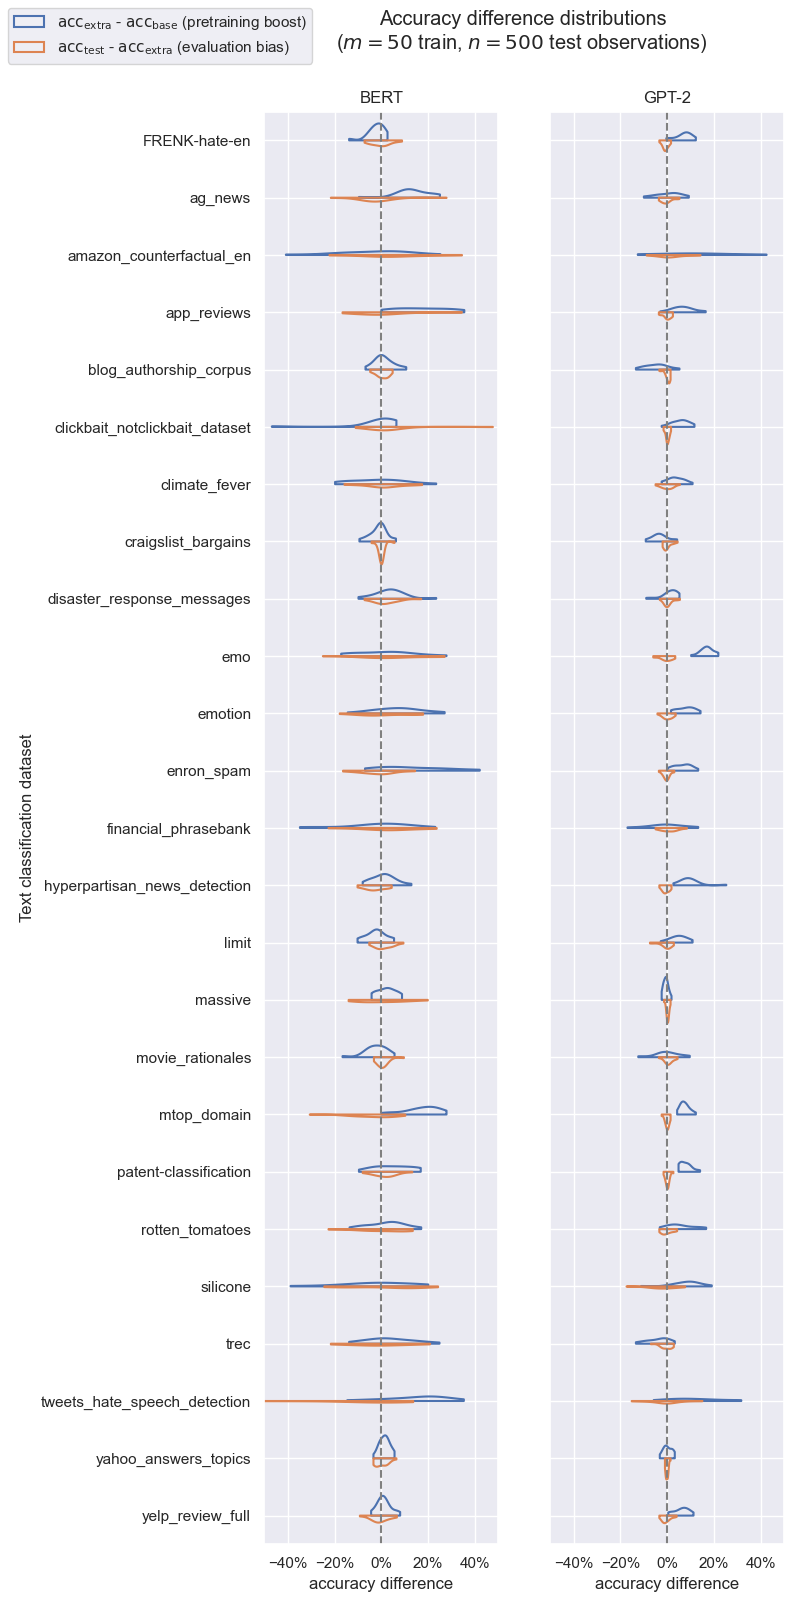

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌─────────┬──────────┐
│ mean    ┆ se       │
╞═════════╪══════════╡
│ 0.04061 ┆ 0.009036 │
└─────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.198619 ┆ 0.056562 │
└──────────┴──────────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.0231,0.012982
"""ag_news""",0.06895,0.02067
"""amazon_counter…",0.0442,0.037464
"""app_reviews""",0.11885,0.022614
"""blog_authorshi…",-0.01795,0.011856
…,…,…
"""silicone""",0.0334,0.027857
"""trec""",-0.00185,0.019442
"""tweets_hate_sp…",0.1337,0.026855
"""yahoo_answers_…",0.00785,0.004806


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.054106,0.025283
"""ag_news""",0.127452,0.04223
"""amazon_counter…",0.122994,0.077511
"""app_reviews""",0.932929,0.193199
"""blog_authorshi…",-0.029187,0.022639
…,…,…
"""silicone""",0.139717,0.067943
"""trec""",0.034178,0.091192
"""tweets_hate_sp…",0.272451,0.058745
"""yahoo_answers_…",0.090332,0.048601


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 664 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.07384,0.13607,-0.13683,0.29837,0.00252,0.00207,2912.79747,2848.17265,1.00051
1|dataset:method[FRENK-hate-en:extra],-0.06115,0.13705,-0.27345,0.15848,0.00256,0.00215,2889.64112,2531.30288,1.00071
1|dataset:method[ag_news:base],-0.03470,0.13845,-0.26044,0.18119,0.00254,0.00211,2976.95702,2580.03721,1.00178
1|dataset:method[ag_news:extra],0.05002,0.13796,-0.16707,0.26680,0.00254,0.00200,2961.02821,2580.04321,1.00106
1|dataset:method[amazon_counterfactual_en:base],0.02578,0.13642,-0.18926,0.24770,0.00231,0.00239,3522.86757,2525.10648,0.99987
1|dataset:method[amazon_counterfactual_en:extra],0.00233,0.13800,-0.22932,0.20947,0.00246,0.00239,3188.20601,2486.25781,1.00035
1|dataset:method[app_reviews:base],-0.28597,0.13884,-0.48557,-0.04315,0.00231,0.00171,3598.41731,2872.96603,1.00084
1|dataset:method[app_reviews:extra],0.25463,0.13971,0.04524,0.48386,0.00236,0.00168,3522.88318,2944.59843,1.00013
1|dataset:method[blog_authorship_corpus:base],0.15218,0.13702,-0.07865,0.36172,0.00251,0.00188,2980.30295,2722.39983,1.00152
1|dataset:method[blog_authorship_corpus:extra],-0.14795,0.13752,-0.36804,0.06303,0.00254,0.00188,2931.88130,2764.01405,1.00106


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


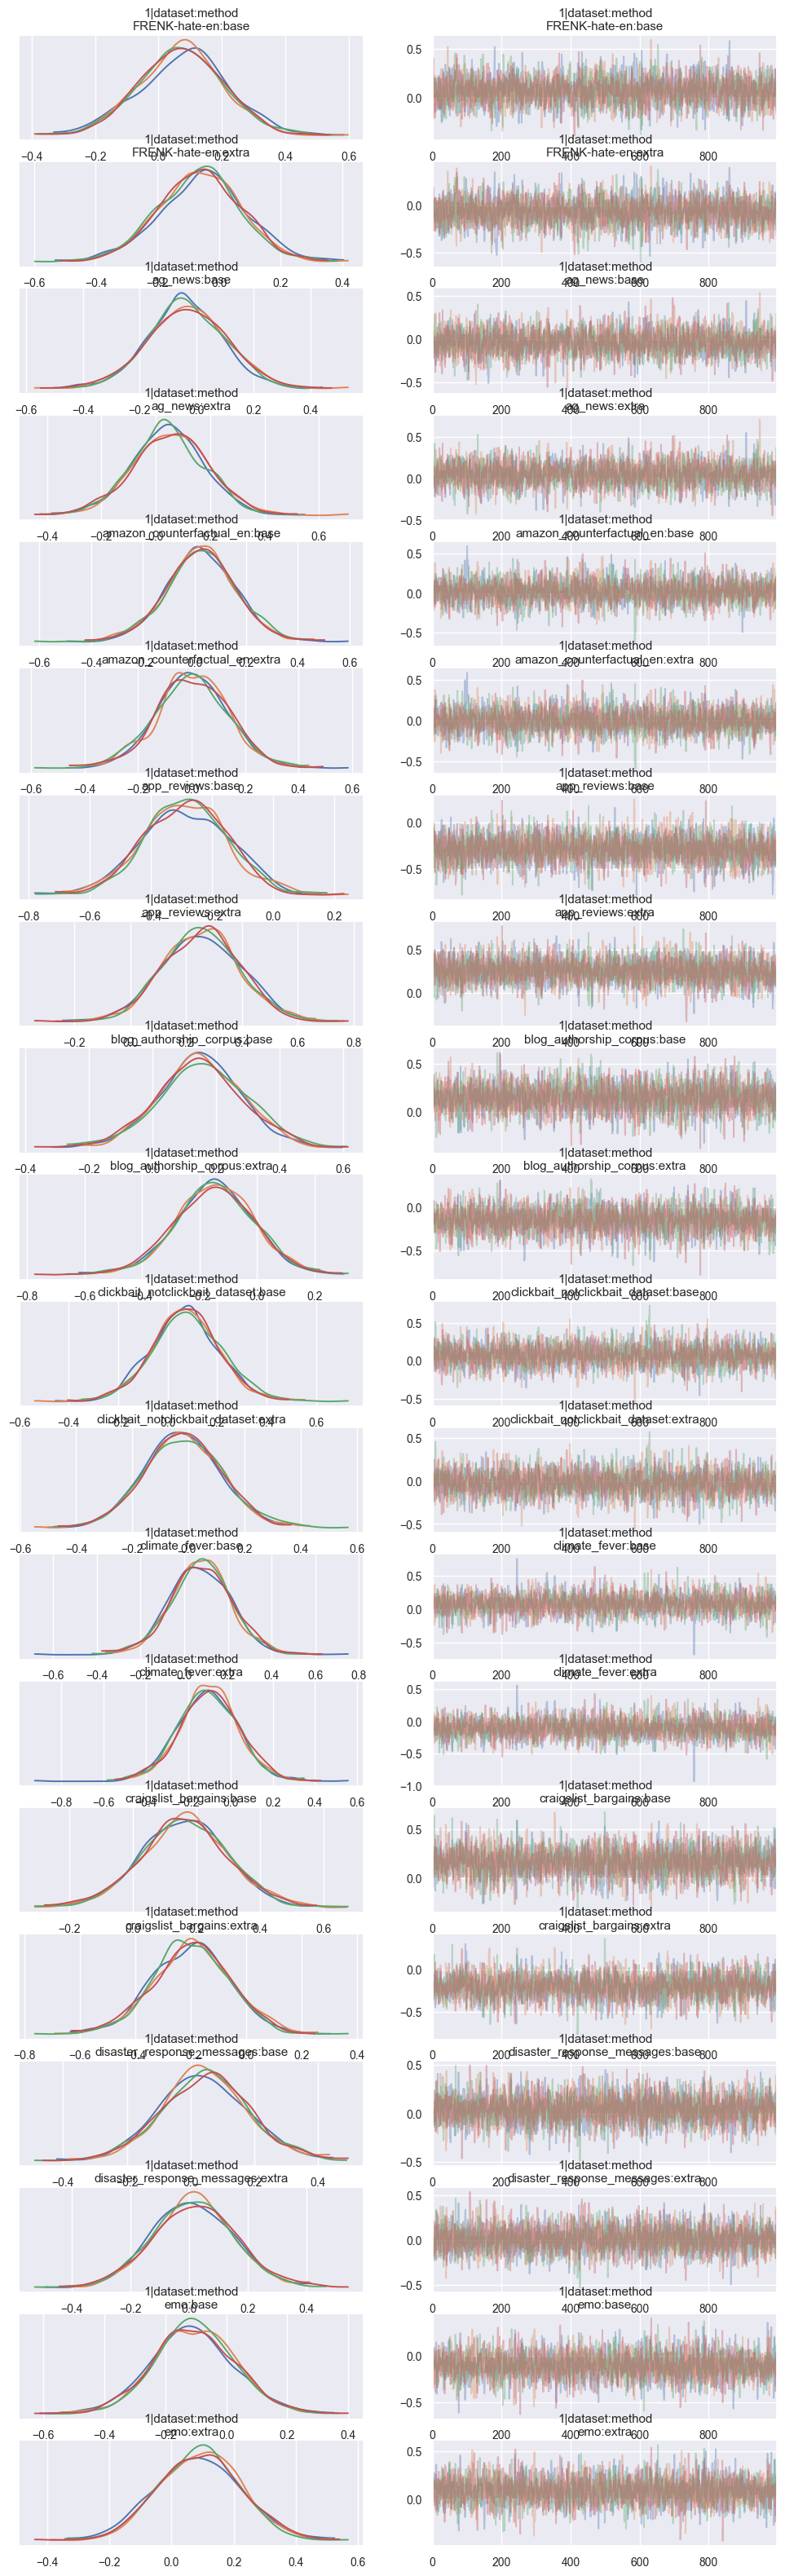

In [10]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_control)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────┬─────────┐
│ mean  ┆ se      │
╞═══════╪═════════╡
│ 0.002 ┆ 0.00295 │
└───────┴─────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.028789 ┆ 0.009276 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.0046,0.006908
"""ag_news""",-0.0107,0.014752
"""amazon_counter…",0.03475,0.025371
"""app_reviews""",0.00025,0.018601
"""blog_authorshi…",0.0033,0.004504
…,…,…
"""silicone""",0.002,0.025635
"""trec""",-0.00815,0.019206
"""tweets_hate_sp…",-0.0363,0.034703
"""yahoo_answers_…",-0.0006,0.00436


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",-0.006942,0.012228
"""ag_news""",-0.005835,0.030012
"""amazon_counter…",0.071811,0.04828
"""app_reviews""",0.053267,0.089104
"""blog_authorshi…",0.00705,0.008931
…,…,…
"""silicone""",0.046322,0.066735
"""trec""",0.01388,0.074606
"""tweets_hate_sp…",-0.04126,0.043392
"""yahoo_answers_…",0.01159,0.044044


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 531 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],0.01453,0.03908,-0.04797,0.07646,0.00068,0.00053,3319.71611,2926.01905,1.00088
1|dataset:method[FRENK-hate-en:test],-0.01442,0.03969,-0.08032,0.04685,0.00070,0.00057,3176.61918,3172.11019,1.00165
1|dataset:method[ag_news:extra],0.02930,0.03951,-0.03853,0.08737,0.00069,0.00053,3293.80722,3079.80570,1.00010
1|dataset:method[ag_news:test],-0.02828,0.04021,-0.08822,0.03993,0.00069,0.00055,3368.08355,2701.91454,1.00073
1|dataset:method[amazon_counterfactual_en:extra],-0.07335,0.04077,-0.14257,-0.01322,0.00071,0.00051,3308.15284,3293.11790,1.00209
1|dataset:method[amazon_counterfactual_en:test],0.07666,0.04144,0.00944,0.14137,0.00072,0.00054,3307.64457,3246.87336,1.00103
1|dataset:method[app_reviews:extra],0.00454,0.04035,-0.05860,0.07019,0.00068,0.00058,3571.14629,3432.11858,1.00217
1|dataset:method[app_reviews:test],-0.00500,0.03995,-0.06816,0.05765,0.00069,0.00055,3398.83216,3349.98309,1.00131
1|dataset:method[blog_authorship_corpus:extra],-0.00212,0.04079,-0.06628,0.06374,0.00077,0.00061,2831.14950,2791.69836,1.00464
1|dataset:method[blog_authorship_corpus:test],-0.00114,0.04033,-0.06320,0.06588,0.00074,0.00059,3023.63621,2785.85611,1.00401


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


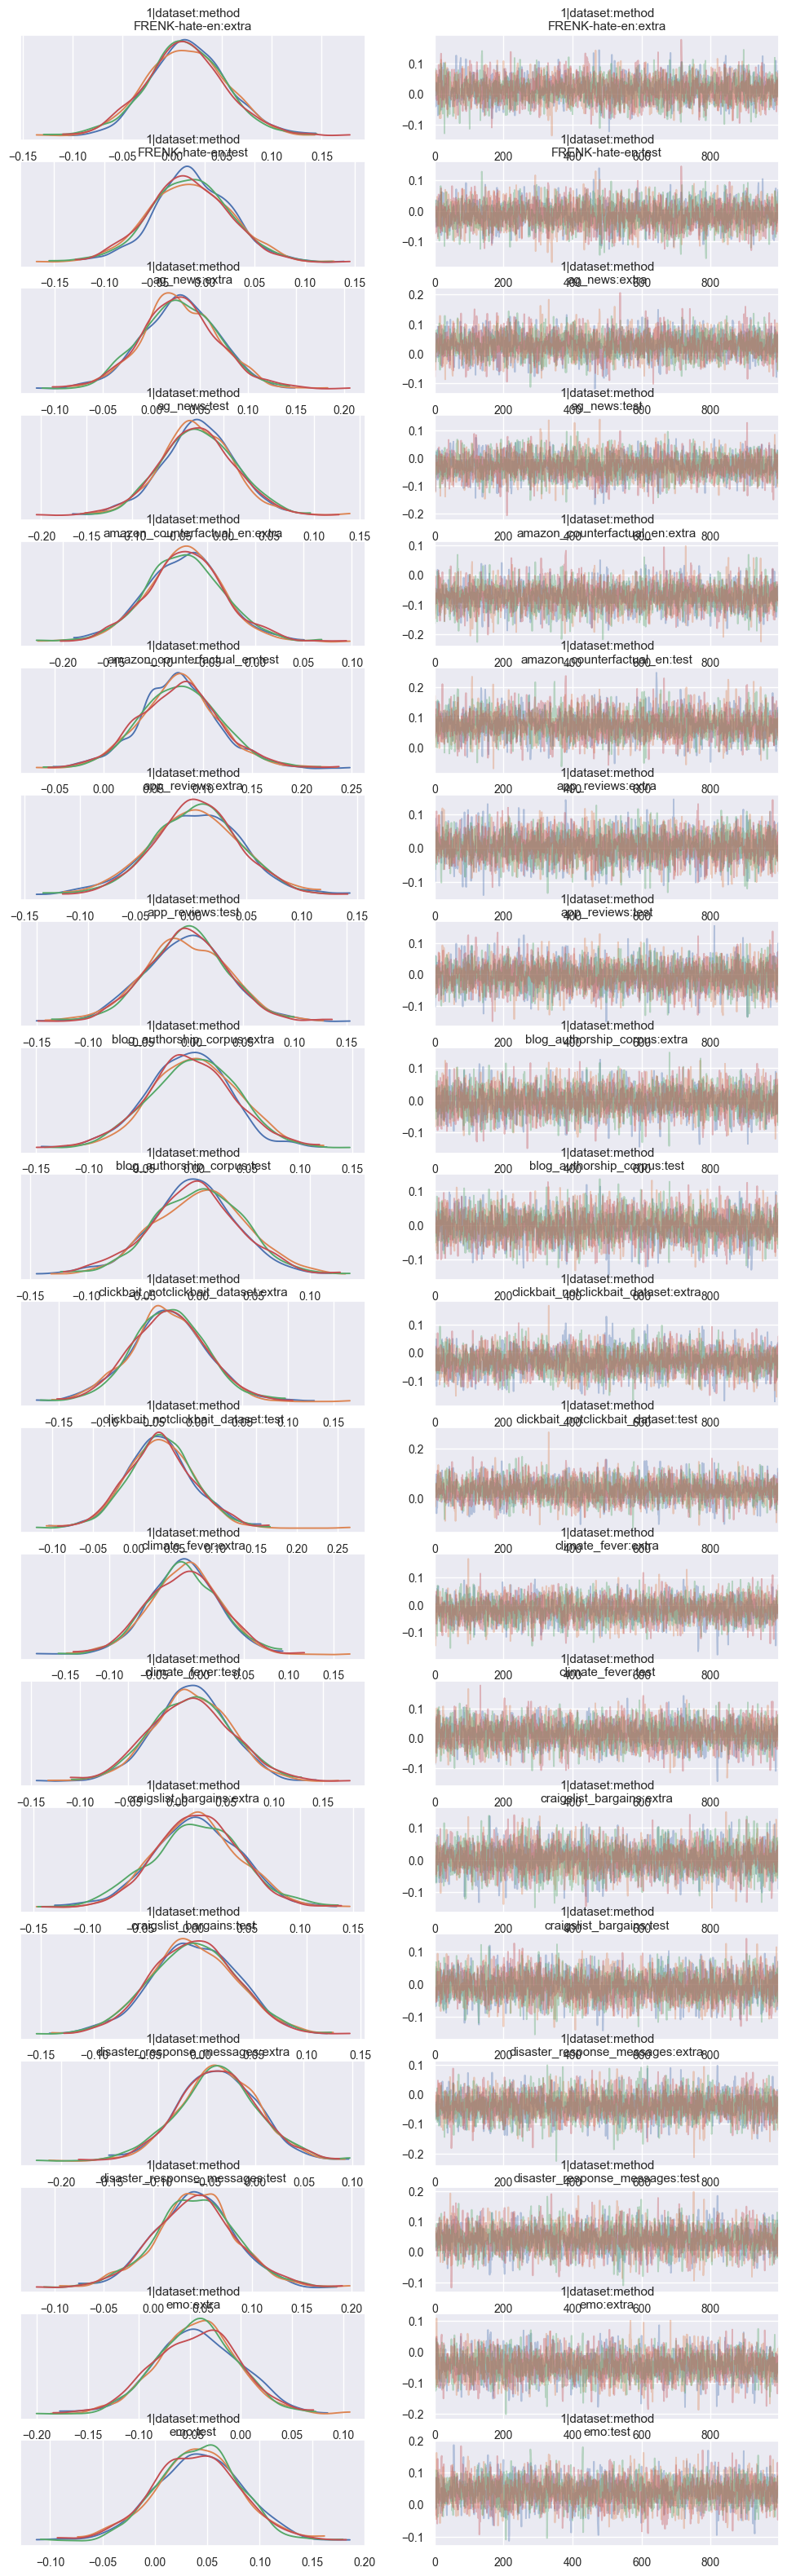

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.mkdir(netcdfs)

In [18]:
summary_control.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
)

'../../netcdfs/m50/main_m50_n500_control.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
)

'../../netcdfs/m50/main_m50_n500_treatment.nc'